# Stock Price Prediction using Deep Learning LSTM

Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.

Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence.

Let’s see how to predict stock prices using Machine Learning and the python programming language. I will start this task by importing all the necessary python libraries that we need for this task:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('AAPL.csv')

In [4]:
df.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
df.tail(3)

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1255,1255,AAPL,2020-05-20 00:00:00+00:00,319.23,319.52,316.20,316.68,27876215,319.23,319.52,316.20,316.68,27876215,0.0,1.0
1256,1256,AAPL,2020-05-21 00:00:00+00:00,316.85,320.89,315.87,318.66,25672211,316.85,320.89,315.87,318.66,25672211,0.0,1.0
1257,1257,AAPL,2020-05-22 00:00:00+00:00,318.89,319.23,315.35,315.77,20450754,318.89,319.23,315.35,315.77,20450754,0.0,1.0


In [6]:
df1= df['close']

<Axes: >

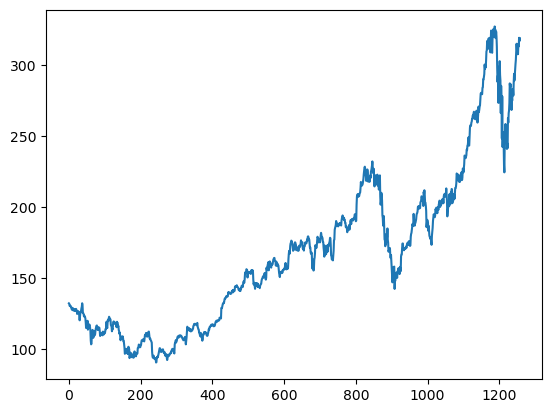

In [7]:
df1.plot()

### Scaling

In [8]:
df1=np.array(df1).reshape(-1,1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1= scaler.fit_transform(df1)

In [10]:
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


### Spliting Data into Traning and Testing Set

In [11]:
training_size = int(len(df1)*0.65)
test_size= len(df1)- training_size
train_data, test_data = df1[0:training_size,:], df1[training_size:len(df1),:1]

In [12]:
training_size, test_size

(817, 441)

In [13]:
train_data.shape

(817, 1)

In [14]:
train_data[:10]

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       [0.1696994 ],
       [0.16727181],
       [0.16794731],
       [0.16473866],
       [0.16174111],
       [0.1581525 ],
       [0.15654817]])

### Convert an Array of Values -> Dataset Matrix

In [15]:
import numpy

In [16]:
def create_dataset(dataset, time_step=1):
    dataX, dataY =[], []
    for i in range(len(dataset)- time_step-1):
        a= dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [17]:
#reshape into X=t, t+1, t+2, t+3 and y= t+4
time_step =100
X_train, y_train= create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

Reshaping input to be [sample, time_steps, features] which is required for LSTM

In [20]:
X_train= X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Building LSTM Model

In [21]:
# Create the stacked LSTM model
from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape= (100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

/Users/youssef/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.0297 - val_loss: 0.0727
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0048 - val_loss: 0.0060
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0018 - val_loss: 0.0050
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 8.7764e-04 - val_loss: 0.0062
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 7.0718e-04 - val_loss: 0.0090
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 6.7315e-04 - val_loss: 0.0062
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 6.3078e-04 - val_loss: 0.0048
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 6.2219e-04 - val_loss: 0.0040
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 6.9819e-04 - val_loss: 0.0041
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 7.1031e-04 - val_loss: 0.0039
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 6.5136e-04 - val_loss: 0.0037
Epoch 12/50
12/12 ━━━━━━━━━━━━━

In [25]:
import tensorflow as tf
tf.__version__

'2.16.1'

## Predictions & Model Evaluation

In [26]:
#lets do the predictions and check performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [27]:
train_predict[:5]

array([[0.08696653],
       [0.08773434],
       [0.08848303],
       [0.08952304],
       [0.09089066]], dtype=float32)

In [28]:
y_train[:5]

array([0.0873934 , 0.09030651, 0.09891919, 0.09887697, 0.10622309])

#### Transform back to original form

In [29]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

#### Calculate RMSE performance metrics

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

141.51734745783952

In [31]:
pred_df = pd.DataFrame(test_predict)

In [32]:
y_test= scaler.inverse_transform(ytest.reshape(-1,1))

In [33]:
pred_df['TrueValues']= y_test

In [34]:
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})

Text(0.5, 1.0, 'Predictions VS True values on Testing Set')

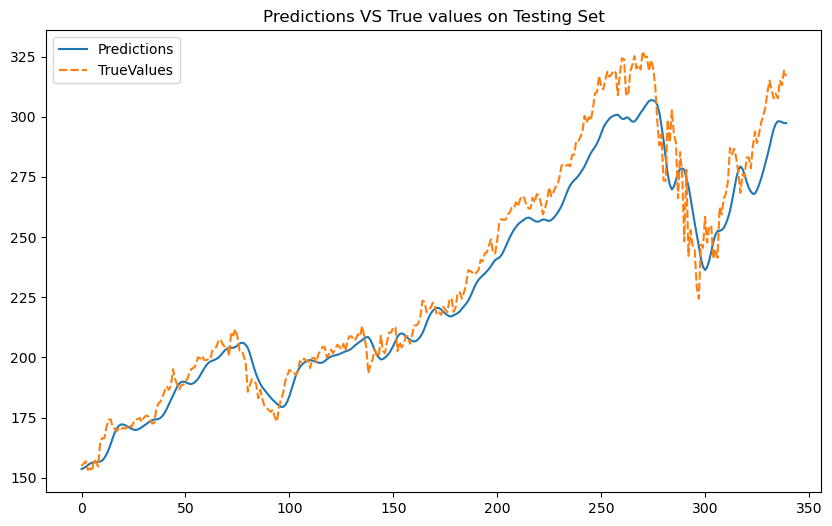

In [35]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.lineplot(data= pred_df_new)
plt.title("Predictions VS True values on Testing Set")

#### Plotting

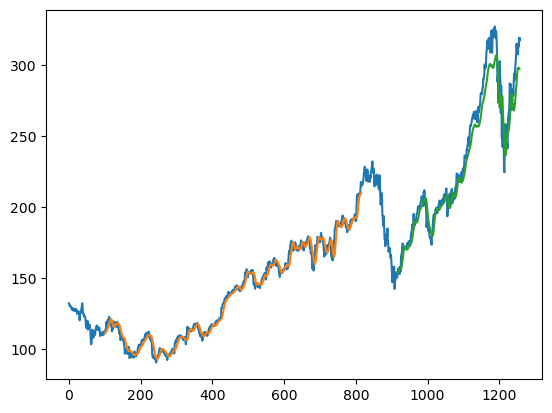

In [36]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

We are using 100 inputs for predicting 1 day output

In [37]:
x_input = test_data[341:].reshape(1,-1)

In [38]:
x_input.shape

(1, 100)

In [39]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [40]:
temp_input[0:10]

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415]

### Prediction for Next 30 Days

In [41]:
import numpy as np
import pandas as pd

lst_output = []
n_steps = 100
i = 0

output_table = []

while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        
        print('{} day input: {}'.format(i, x_input))
        print('{} day output: {}'.format(i, yhat))
        
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        
        output_table.append([i, yhat[0]])
        
        i += 1
        
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        
        output_table.append([i, yhat[0]])
        
        i += 1

print(lst_output)

[0.8776218]
101
1 day input: [[[0.8866419 ]
  [0.87431394]
  [0.88431985]
  [0.87836697]
  [0.8986321 ]
  [0.92582116]
  [0.92877649]
  [0.95676771]
  [0.93869797]
  [0.93304061]
  [0.94950604]
  [0.96424048]
  [0.95512117]
  [0.95989192]
  [0.96635143]
  [0.96246728]
  [0.92295027]
  [0.9598497 ]
  [0.98792536]
  [0.98594106]
  [0.92531453]
  [0.92172591]
  [0.96474711]
  [0.97572406]
  [0.99159841]
  [0.96972895]
  [0.97614625]
  [0.96795575]
  [1.        ]
  [0.99016297]
  [0.99050072]
  [0.96538039]
  [0.98488559]
  [0.97086887]
  [0.94026007]
  [0.87748037]
  [0.83483915]
  [0.85413324]
  [0.77336823]
  [0.77269273]
  [0.88014017]
  [0.84007431]
  [0.89673225]
  [0.85527316]
  [0.83884995]
  [0.74233725]
  [0.82327113]
  [0.78143207]
  [0.6665963 ]
  [0.7921557 ]
  [0.64118044]
  [0.68614371]
  [0.66001013]
  [0.65203074]
  [0.58642236]
  [0.56586169]
  [0.66089673]
  [0.65515494]
  [0.70970193]
  [0.66452757]
  [0.69437642]
  [0.69218104]
  [0.63569197]
  [0.65266402]
  [0.637802

11 day input: [[[0.94950604]
  [0.96424048]
  [0.95512117]
  [0.95989192]
  [0.96635143]
  [0.96246728]
  [0.92295027]
  [0.9598497 ]
  [0.98792536]
  [0.98594106]
  [0.92531453]
  [0.92172591]
  [0.96474711]
  [0.97572406]
  [0.99159841]
  [0.96972895]
  [0.97614625]
  [0.96795575]
  [1.        ]
  [0.99016297]
  [0.99050072]
  [0.96538039]
  [0.98488559]
  [0.97086887]
  [0.94026007]
  [0.87748037]
  [0.83483915]
  [0.85413324]
  [0.77336823]
  [0.77269273]
  [0.88014017]
  [0.84007431]
  [0.89673225]
  [0.85527316]
  [0.83884995]
  [0.74233725]
  [0.82327113]
  [0.78143207]
  [0.6665963 ]
  [0.7921557 ]
  [0.64118044]
  [0.68614371]
  [0.66001013]
  [0.65203074]
  [0.58642236]
  [0.56586169]
  [0.66089673]
  [0.65515494]
  [0.70970193]
  [0.66452757]
  [0.69437642]
  [0.69218104]
  [0.63569197]
  [0.65266402]
  [0.63780292]
  [0.7267162 ]
  [0.71388162]
  [0.74191506]
  [0.75002111]
  [0.77222832]
  [0.83049059]
  [0.8194292 ]
  [0.8289707 ]
  [0.8125475 ]
  [0.78776492]
  [0.751625

23 day input: [[[0.96474711]
  [0.97572406]
  [0.99159841]
  [0.96972895]
  [0.97614625]
  [0.96795575]
  [1.        ]
  [0.99016297]
  [0.99050072]
  [0.96538039]
  [0.98488559]
  [0.97086887]
  [0.94026007]
  [0.87748037]
  [0.83483915]
  [0.85413324]
  [0.77336823]
  [0.77269273]
  [0.88014017]
  [0.84007431]
  [0.89673225]
  [0.85527316]
  [0.83884995]
  [0.74233725]
  [0.82327113]
  [0.78143207]
  [0.6665963 ]
  [0.7921557 ]
  [0.64118044]
  [0.68614371]
  [0.66001013]
  [0.65203074]
  [0.58642236]
  [0.56586169]
  [0.66089673]
  [0.65515494]
  [0.70970193]
  [0.66452757]
  [0.69437642]
  [0.69218104]
  [0.63569197]
  [0.65266402]
  [0.63780292]
  [0.7267162 ]
  [0.71388162]
  [0.74191506]
  [0.75002111]
  [0.77222832]
  [0.83049059]
  [0.8194292 ]
  [0.8289707 ]
  [0.8125475 ]
  [0.78776492]
  [0.75162543]
  [0.78426074]
  [0.77974331]
  [0.81326522]
  [0.8141096 ]
  [0.79473106]
  [0.83336148]
  [0.85898843]
  [0.83901883]
  [0.85628641]
  [0.87486279]
  [0.88782403]
  [0.900954

In [42]:
# Create a table using pandas
df = pd.DataFrame(output_table, columns=["Day Number", "Prediction"])
print(df)

    Day Number    Prediction
0            0   [0.8776218]
1            1  [0.87335277]
2            2   [0.8624804]
3            3  [0.84682024]
4            4   [0.8284134]
5            5  [0.80894583]
6            6   [0.7896225]
7            7   [0.7712314]
8            8   [0.7542548]
9            9  [0.73896885]
10          10   [0.7255129]
11          11   [0.7139349]
12          12   [0.7042182]
13          13   [0.6962975]
14          14     [0.69007]
15          15  [0.68540454]
16          16   [0.6821472]
17          17   [0.6801289]
18          18   [0.6791703]
19          19  [0.67908716]
20          20  [0.67969507]
21          21  [0.68081397]
22          22   [0.6822705]
23          23  [0.68390346]
24          24   [0.6855643]
25          25   [0.6871208]
26          26  [0.68845946]
27          27   [0.6894846]
28          28   [0.6901212]
29          29   [0.6903139]


In [43]:
day_new = np.arange(1,101)
day_pred = np.arange(101,131)

In [44]:
len(df1)

1258

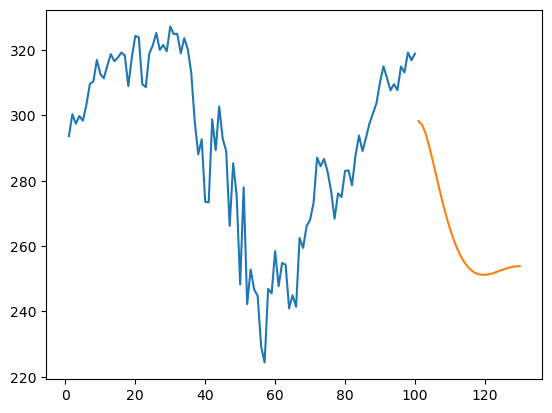

In [45]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))

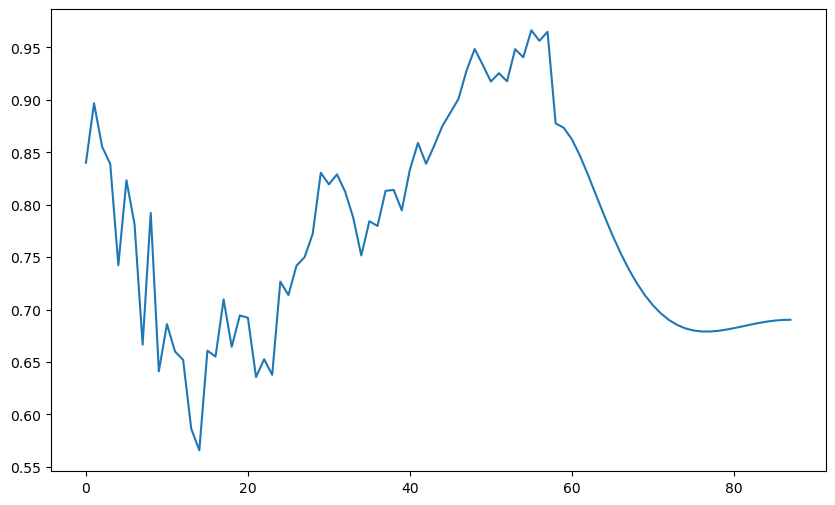

In [46]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.figure(figsize=(10,6))
plt.plot(df3[1200:])

# Model CNN

In [70]:
# Reshape the input for the CNN model if necessary
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the base model function for CNN
def base_model_cnn():
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train_cnn.shape[1:]))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    return model

# Recreate the optimizer object
optimizer = Adam(learning_rate=0.001)

# Create the CNN model
cnn_model = base_model_cnn()
cnn_model.compile(optimizer=optimizer, loss='mean_absolute_error')
cnn_model.summary()

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
callbacks = [early_stopping, reduce_lr]

# Train the CNN model
cnn_model.fit(X_train_cnn, y_train, validation_data=(X_test_cnn, ytest), epochs=50, batch_size=64, callbacks=callbacks, verbose=1)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_1 (Conv1D)               │ (None, 98, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 401,793 (1.53 MB)

 Trainable params: 401,793 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1164 - val_loss: 0.0733 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0303 - val_loss: 0.1317 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0443 - val_loss: 0.0467 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0221 - val_loss: 0.0643 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0234 - val_loss: 0.0771 - learning_rate: 0.0010
Epoch 6/50
 1/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0226
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0279 - val_loss: 0.0772 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0246 - val_loss: 0.0684 - learning_rate: 1.0000e-04
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0214 - val_loss: 0.0376 - learning_rate: 1.0000e

In [78]:
# Define the plot_results function
import matplotlib.pyplot as plt

def plot_results(predicted_data, true_data, history, title):
    fig, ax = plt.subplots(figsize=(15, 5))
    
    ax.plot(true_data, color='blue', label='True Data')
    ax.plot(predicted_data, color='red', label='Predicted Data')
    
    ax.set_title(f'{title} - Prediction vs True Data')
    ax.set_xlabel('Time')
    ax.set_ylabel('Value')
    ax.legend()
    
    plt.show()
    
    # Plot training & validation loss values
    if history:
        fig, ax = plt.subplots(figsize=(15, 5))
        ax.plot(history.history['loss'], label='Train Loss')
        ax.plot(history.history['val_loss'], label='Validation Loss')
        ax.set_title(f'{title} - Model Loss')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss')
        ax.legend()
        plt.show()


# Model LTSM-CNN

Shape of X_train before reshaping: (716, 100, 1, 1)
Shape of X_train after reshaping: (716, 100, 1)


/Users/youssef/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_5 (Conv1D)               │ (None, 100, 64)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 100, 8)         │         2,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 207,777 (811.63 KB)

 Trainable params: 207,777 (811.63 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0981 - val_loss: 0.0938 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0337 - val_loss: 0.0832 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0302 - val_loss: 0.0798 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0255 - val_loss: 0.0711 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0234 - val_loss: 0.0682 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0209 - val_loss: 0.0700 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0209 - val_loss: 0.0653 - learning_rate: 0.0010
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0186 - val_loss: 0.0652 - learning_rate: 0.0010
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0182 - val_loss: 0.0656 - learning_rate: 0.0010
Epoch 10/50
12/12 ━

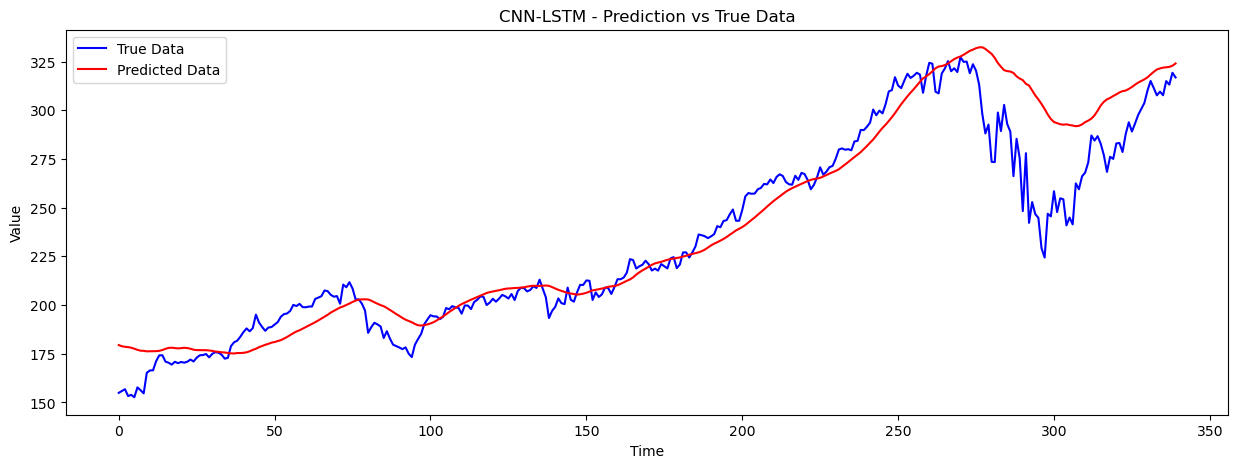

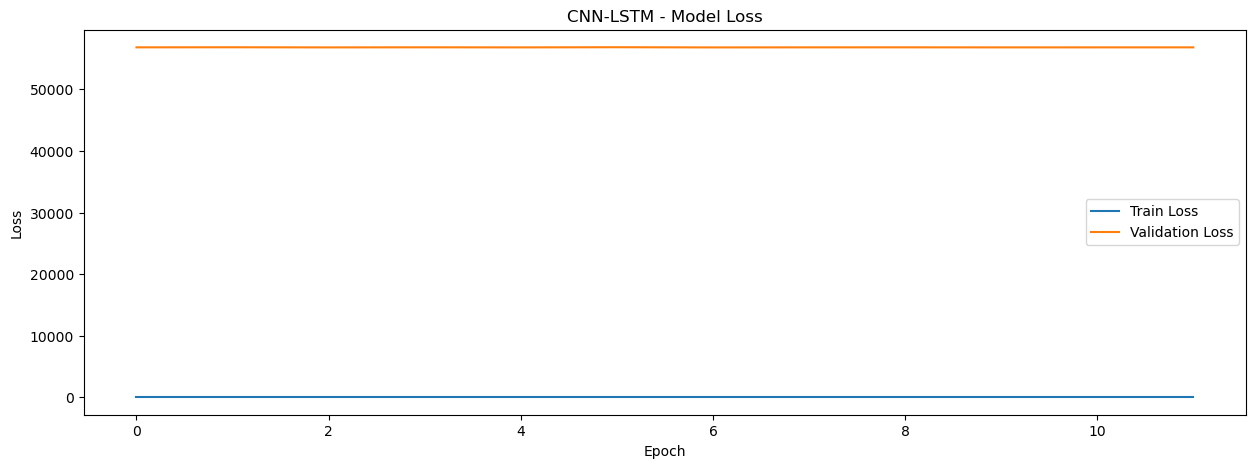

In [79]:
# Import necessary libraries
from sklearn.metrics import mean_absolute_error

# Check the shape of X_train before and after reshaping for the CNN-LSTM model
print(f'Shape of X_train before reshaping: {X_train.shape}')
X_train_cnn_lstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn_lstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
print(f'Shape of X_train after reshaping: {X_train_cnn_lstm.shape}')

# Define the base model function for CNN-LSTM
def base_model_cnn_lstm():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=X_train_cnn_lstm.shape[1:]))
    model.add(LSTM(units=8, return_sequences=True, activation="relu"))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1))
    return model

# Recreate the optimizer object
optimizer = Adam(learning_rate=0.001)

# Create the CNN-LSTM model
cnn_lstm_model = base_model_cnn_lstm()
cnn_lstm_model.compile(optimizer=optimizer, loss='mean_absolute_error')
cnn_lstm_model.summary()

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
callbacks = [early_stopping, reduce_lr]

# Train the CNN-LSTM model
cnn_lstm_model.fit(X_train_cnn_lstm, y_train, validation_data=(X_test_cnn_lstm, ytest), epochs=50, batch_size=64, callbacks=callbacks, verbose=1)

# Make predictions using the CNN-LSTM model
y_pred = cnn_lstm_model.predict(X_test_cnn_lstm)
print('')
print('')
print('---------------------------------------------------')
print(f'CNN-LSTM MAE for test set : {round(mean_absolute_error(y_pred, ytest), 3)}')
print('---------------------------------------------------')
y_pred_actual = scaler.inverse_transform(y_pred)
print('')
plot_results(y_pred_actual, scaler.inverse_transform(ytest.reshape(-1, 1)), history, 'CNN-LSTM')


# CNN-LSTM - Prediction vs True Data Graph:

This graph compares the true data with the predicted data using the CNN-LSTM model. The blue line represents the true data, while the red line shows the predicted data. This visual representation helps to evaluate how well the model's predictions align with the actual values.

# CNN-LSTM - Model Loss Graph:

This graph shows the model's training and validation loss over epochs for the CNN-LSTM model. The orange line represents the validation loss, and the blue line represents the training loss. A decreasing loss indicates that the model is learning effectively, with the gap between the training and validation loss providing insights into potential overfitting or underfitting.

# LTSM Attention

Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21      │ (None, 100, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 100, 1)    │          0 │ input_layer_21[0… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking (Masking)   │ (None, 100, 1)    │          0 │ input_layer_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any (Any)           │ (None, 100)       │          0 │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 100, 132)  │     70,752 │ masking[0][0],    │
│                     │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot (Dot)           │ (None, 100, 100)  │          0 │ lstm_6[0][0],     │
│                     │                   │            │ lstm_6[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 100, 100)  │     10,100 │ dot[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_1 (Dot)         │ (None, 100, 132)  │          0 │ dense_34[0][0],   │
│                     │                   │            │ lstm_6[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_15          │ (None, 13200)     │          0 │ dot_1[0][0]       │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 1)         │     13,201 │ flatten_15[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 94,053 (367.39 KB)

 Trainable params: 94,053 (367.39 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - loss: 0.1065 - val_loss: 0.1277 - learning_rate: 0.0010
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0389 - val_loss: 0.0926 - learning_rate: 0.0010
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0369 - val_loss: 0.0897 - learning_rate: 0.0010
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0307 - val_loss: 0.0842 - learning_rate: 0.0010
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - loss: 0.0299 - val_loss: 0.0835 - learning_rate: 0.0010
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0300 - val_loss: 0.0839 - learning_rate: 0.0010
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step - loss: 0.0298 - val_loss: 0.0845 - learning_rate: 0.0010
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0309 - val_loss: 0.0833 - learning_rate: 0.0010
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - loss: 0.0297 - val_loss: 0.0810 - learning_rate: 0.0010
Epoch 10/50
12/

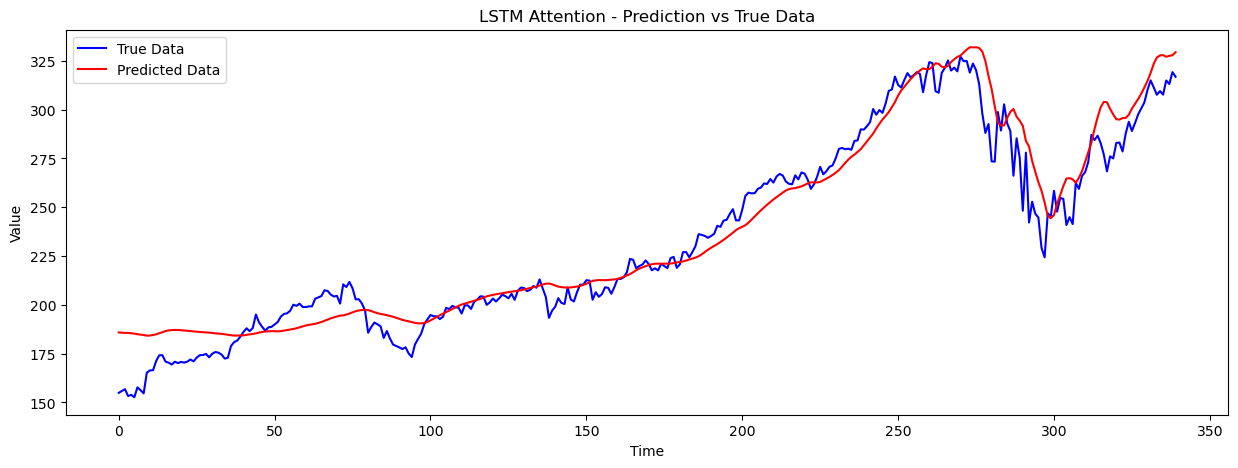

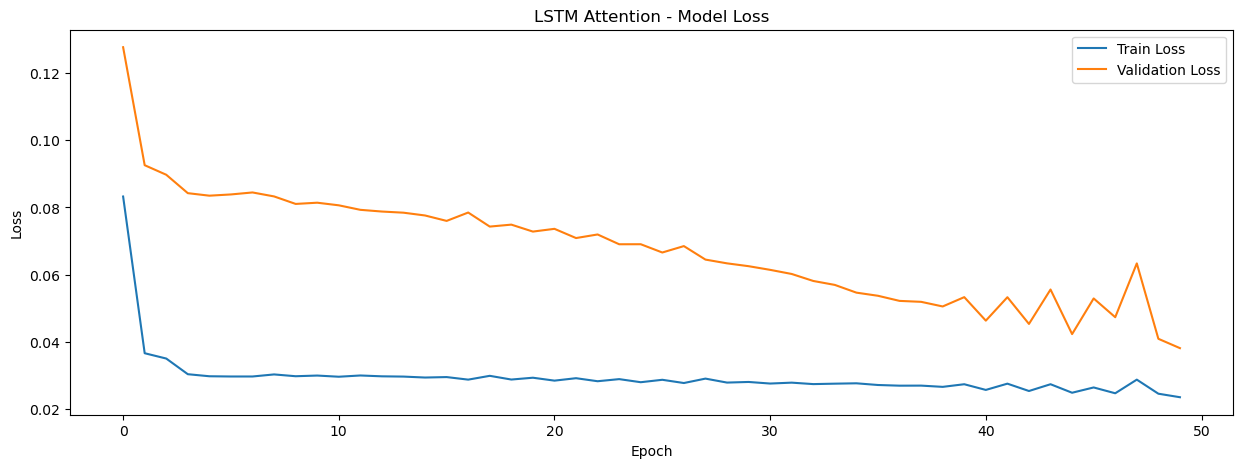

In [80]:
from tensorflow.keras.layers import Input, Masking, LSTM, dot, Dense, Flatten
from tensorflow.keras.models import Model

# Define the LSTM with Attention model
def LSTM_attention():
    inputs = Input(shape=(X_train.shape[1], X_train.shape[2]))
    masked = Masking(mask_value=0.)(inputs)
    lstm = LSTM(132, return_sequences=True)(masked)
    attention = dot([lstm, lstm], axes=[2, 2])
    attention = Dense(X_train.shape[1], activation='softmax')(attention)
    context = dot([attention, lstm], axes=[2, 1])
    flattened = Flatten()(context)
    output = Dense(1)(flattened)
    model = Model(inputs=inputs, outputs=output)
    return model

# Recreate the optimizer object
optimizer = Adam(learning_rate=0.001)

# Create the LSTM Attention model
LSTM_attention_model = LSTM_attention()
LSTM_attention_model.compile(optimizer=optimizer, loss='mae')
LSTM_attention_model.summary()

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
callbacks = [early_stopping, reduce_lr]

# Train the LSTM Attention model
history = LSTM_attention_model.fit(X_train, y_train, validation_data=(X_test, ytest), epochs=50, batch_size=64, callbacks=callbacks, verbose=1)

# Make predictions using the LSTM Attention model
y_pred = LSTM_attention_model.predict(X_test)
print('')
print('')
print('---------------------------------------------------')
print(f'LSTM Attention MAE for test set : {round(mean_absolute_error(y_pred, ytest), 3)}')
print('---------------------------------------------------')
y_pred_actual = scaler.inverse_transform(y_pred)
print('')
plot_results(y_pred_actual, scaler.inverse_transform(ytest.reshape(-1, 1)), history, 'LSTM Attention')


# LSTM Attention - Prediction vs True Data Graph:

This graph compares the true data with the predicted data using the LSTM Attention model. The blue line represents the true data, while the red line shows the predicted data. This visual representation helps to evaluate how well the model's predictions align with the actual values.

# LSTM Attention - Model Loss Graph:

This graph shows the model's training and validation loss over epochs for the LSTM Attention model. The orange line represents the validation loss, and the blue line represents the training loss. A decreasing loss indicates that the model is learning effectively, with the gap between the training and validation loss providing insights into potential overfitting or underfitting.

# Model : Hybrid GRU-XGBOOST

In [82]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/03/e6/4aef6799badc2693548559bad5b56d56cfe89eada337c815fdfe92175250/xgboost-2.0.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 697.5 kB/s eta 0:00:0000:0100:01


In [92]:
from sklearn.model_selection import train_test_split

# Create validation set from the training data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reshape the data to the correct shape (samples, time_steps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Define X_train_xgb and X_val_xgb
X_train_xgb = X_train.reshape(X_train.shape[0], -1)  # Flatten the data for XGBoost
X_val_xgb = X_val.reshape(X_val.shape[0], -1)  # Flatten the data for XGBoost

# Print the shapes of the arrays
print(f'X_train shape: {X_train.shape}')
print(f'X_train_xgb shape: {X_train_xgb.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_val_xgb shape: {X_val_xgb.shape}')
print(f'y_val shape: {y_val.shape}')

# Install xgboost
!pip install xgboost

from tensorflow.keras.layers import GRU
import xgboost as xgb

# Define the base GRU model function
def base_model_gru():
    model = Sequential()
    model.add(GRU(units=32, return_sequences=True, activation="relu", input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Flatten())
    model.add(Dense(units=128, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1))
    return model

# Initialize the GRU model
gru_model = base_model_gru()

# Define the optimizer
optimizer = Adam(learning_rate=0.001)

# Compile the model
gru_model.compile(optimizer=optimizer, loss='mean_absolute_error')

print('')
print('GRU is fitting a model on train-validation sets...')
print('')

# Define the callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
callbacks = [early_stopping, reduce_lr]

# Fit the model
gru_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=64, callbacks=callbacks)

print('')
print('----------------------------------')
print('GRU is predicting...')
print('')

# Compute residuals
residuals_train = y_train - gru_model.predict(X_train).reshape(-1)
residuals_val = y_val - gru_model.predict(X_val).reshape(-1)

# Print the shapes of the residuals
print(f'residuals_train shape: {residuals_train.shape}')
print(f'residuals_val shape: {residuals_val.shape}')

print('')
print('----------------------------------')
print('XGBoost is fitting a model on residuals...')
print('')

# Ensure residuals have the correct shape
assert residuals_train.shape[0] == X_train_xgb.shape[0], "Mismatch between residuals_train and X_train_xgb"
assert residuals_val.shape[0] == X_val_xgb.shape[0], "Mismatch between residuals_val and X_val_xgb"

xgb_hybrid = xgb.XGBRegressor(eval_metric='mae', early_stopping_rounds=8)
xgb_hybrid.fit(X_train_xgb, residuals_train,
               eval_set=[(X_train_xgb, residuals_train), (X_val_xgb, residuals_val)],     
               verbose=False) 

y_train_pred = gru_model.predict(X_train) + xgb_hybrid.predict(X_train_xgb).reshape(-1,1)
y_val_pred = gru_model.predict(X_val) + xgb_hybrid.predict(X_val_xgb).reshape(-1,1)


X_train shape: (94, 100, 1)
X_train_xgb shape: (94, 100)
y_train shape: (94,)
X_val shape: (24, 100, 1)
X_val_xgb shape: (24, 100)
y_val shape: (24,)

GRU is fitting a model on train-validation sets...

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - loss: 0.1637 - val_loss: 0.0307 - learning_rate: 0.0010
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0317 - val_loss: 0.0419 - learning_rate: 0.0010
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0348 - val_loss: 0.0262 - learning_rate: 0.0010
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0312 - val_loss: 0.0321 - learning_rate: 0.0010
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0296 - val_loss: 0.0326 - learning_rate: 0.0010
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0298 - val_loss: 0.0231 - learning_rate: 0.0010
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0272 - val_loss: 0.0249 - learning_rate: 0.0010
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/ste

X_test shape: (340, 100, 1)
X_test_xgb shape: (340, 100)
y_test shape: (340, 1)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted values (scaled): [[0.391429  ]
 [0.38921565]
 [0.3876363 ]
 [0.38566837]
 [0.38267797]
 [0.378342  ]
 [0.37429994]
 [0.3478046 ]
 [0.3484187 ]
 [0.3717739 ]]


---------------------------------------------------
GRU-XGBoost MAE for test set : 233.282
---------------------------------------------------
Predicted values (actual): [[0.21512055]
 [0.21398173]
 [0.21316913]
 [0.21215656]
 [0.21061794]
 [0.20838699]
 [0.20630725]
 [0.19267479]
 [0.19299075]
 [0.20500754]]
Actual values: [[79.73396859]
 [80.20733007]
 [80.70127248]
 [78.8901503 ]
 [79.20915477]
 [78.58143629]
 [81.18492443]
 [80.43372034]
 [79.60019252]
 [85.0387043 ]]


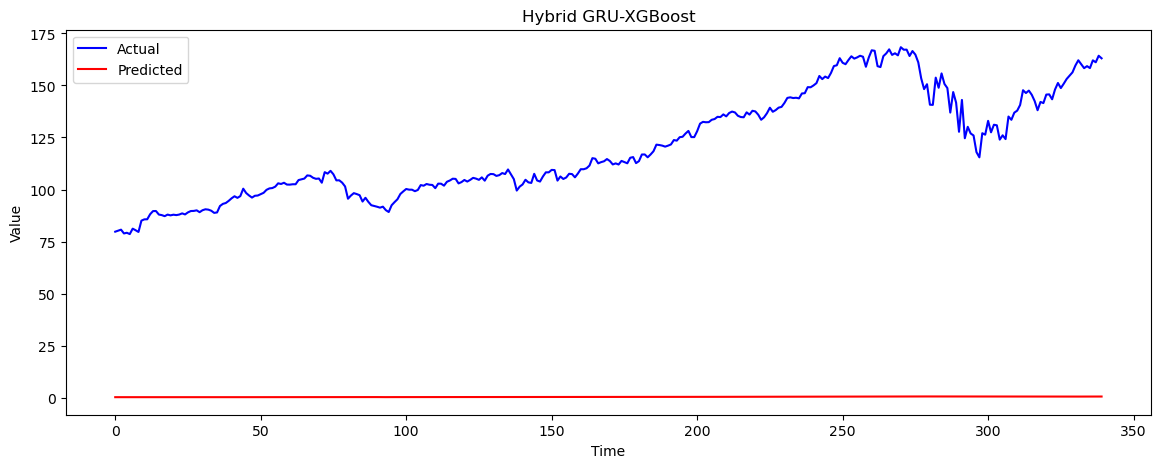

In [101]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Assuming you have y_train available
scaler_y = MinMaxScaler()
scaler_y.fit(y_train.reshape(-1, 1))

# Ensure to replace these variables with their respective values or definitions in your notebook
# X_test, y_test

# Reshape the test data to match the input shape expected by the GRU model
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
X_test_xgb = X_test.reshape(X_test.shape[0], -1)  # Flatten the data for XGBoost

# Print shapes to confirm
print(f'X_test shape: {X_test.shape}')
print(f'X_test_xgb shape: {X_test_xgb.shape}')
print(f'y_test shape: {y_test.shape}')

# Predict on the test set
y_test_pred = gru_model.predict(X_test) + xgb_hybrid.predict(X_test_xgb).reshape(-1, 1)

# Check the predicted values
print('Predicted values (scaled):', y_test_pred[:10])  # Print first 10 for brevity

print('')
print('')
print('---------------------------------------------------')
print(f'GRU-XGBoost MAE for test set : {round(mean_absolute_error(y_test, y_test_pred), 3)}')
print('---------------------------------------------------')

# Inverse transform the predictions and target variables
y_pred_actual = scaler_y.inverse_transform(y_test_pred)
y_test_inv = scaler_y.inverse_transform(y_test)

# Check the predicted values after inverse transformation
print('Predicted values (actual):', y_pred_actual[:10])  # Print first 10 for brevity
print('Actual values:', y_test_inv[:10])  # Print first 10 for brevity

# Define the plot_results function if not already defined
def plot_results(predicted, actual, model_name, title):
    plt.figure(figsize=(14, 5))
    plt.plot(actual, color='blue', label='Actual')
    plt.plot(predicted, color='red', label='Predicted')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Plot the results
plot_results(y_pred_actual, y_test_inv, 'hybrid', 'Hybrid GRU-XGBoost')
